In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]
BATCH_SIZE = 32
BUFFER_SIZE = 100
def y_img(img):
  img = tf.image.resize_with_crop_or_pad(img, 16, 16)
  shifted_img = img[:, :14, ...]

  shifted_img = tf.image.resize_with_pad(shifted_img, 16, int(16*2.5))[:,int(.5*16):int(1.5*16),...]

  return img, shifted_img

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images[:BUFFER_SIZE]).map(y_img).batch(BATCH_SIZE, drop_remainder=True)


11493376/11490434 [==============================] - 0s 0us/step


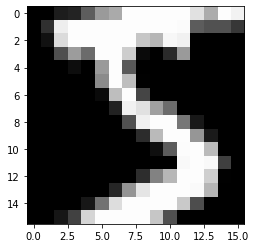

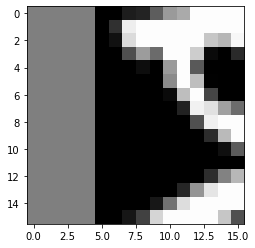

In [3]:
for train, target in train_dataset.take(1):
  plt.imshow(tf.image.grayscale_to_rgb(train[0] * 0.5 + 0.5))
  plt.show()
  plt.imshow(tf.image.grayscale_to_rgb(target[0] * 0.5 +0.5))
  plt.show()
  

In [5]:
optimizer = tf.keras.optimizers.Adam()
mae_loss = tf.keras.losses.MeanAbsoluteError()
def train_step(epochs):
  for i in range(epochs):
    for j, (train, target) in train_dataset.enumerate():
      with tf.GradientTape() as tape:
        pred = model(train,training=True)
        loss = mae_loss(target, pred)
      gradients = tape.gradient(loss, model.trainable_variables)
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    print(f"epoch {i}")
    plt.subplot(1, 3, 1)
    plt.imshow(tf.image.grayscale_to_rgb(train[0]) * 0.5 + 0.5)
    plt.title('input')
    plt.subplot(1, 3, 2)
    plt.imshow(tf.image.grayscale_to_rgb(pred[0]) * 0.5 + 0.5)
    plt.title('pred')
    plt.subplot(1, 3, 3)
    plt.imshow(tf.image.grayscale_to_rgb(target[0]) * 0.5 + 0.5)
    plt.title('target')
    plt.show()
    print(loss)





In [24]:
def show_model():
  return tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [11]:
import tensorflow as tf

#def lamb():
  #return tf.keras.layers.Lambda(lambda x: x[:, ])
def b_model():
  inp = tf.keras.layers.Input([16, 16, 1])

  layers = tf.keras.Sequential([
                                # tf.keras.layers.Flatten(),
            # tf.keras.layers.Reshape(target_shape=[1, 1, 16*16*1]),

          tf.keras.layers.Conv2D(filters=1, kernel_size=(1,1), strides=(1,1), padding="same", activation=tf.nn.tanh, use_bias=False)
          ])
  out = layers(inp)

  return tf.keras.Model(inputs=inp, outputs=out)

model = b_model()




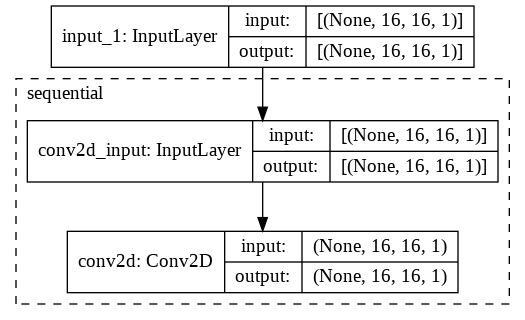

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

epoch 0


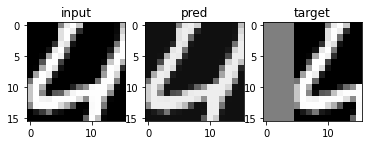

tf.Tensor(0.8921248, shape=(), dtype=float32)
epoch 1


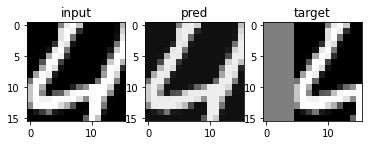

tf.Tensor(0.8918026, shape=(), dtype=float32)
epoch 2


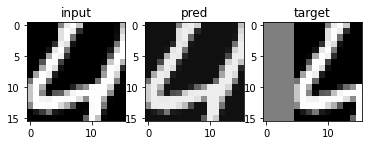

tf.Tensor(0.8914794, shape=(), dtype=float32)
epoch 3


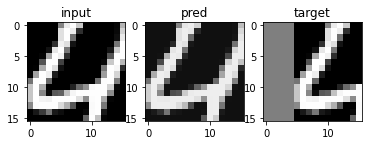

tf.Tensor(0.89115477, shape=(), dtype=float32)
epoch 4


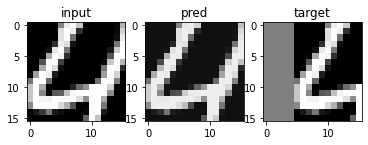

tf.Tensor(0.8908282, shape=(), dtype=float32)
epoch 5


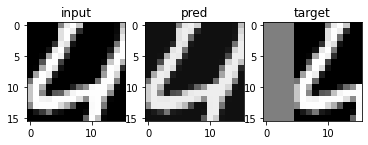

tf.Tensor(0.89049923, shape=(), dtype=float32)
epoch 6


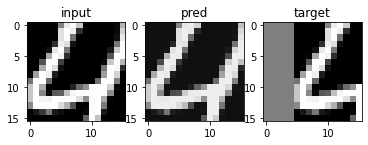

tf.Tensor(0.89016914, shape=(), dtype=float32)
epoch 7


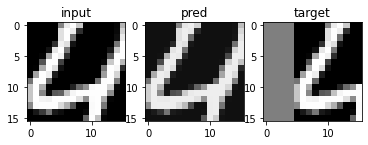

tf.Tensor(0.889837, shape=(), dtype=float32)
epoch 8


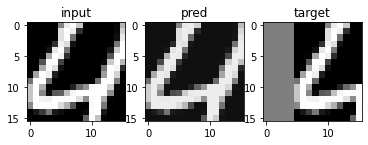

tf.Tensor(0.8895036, shape=(), dtype=float32)
epoch 9


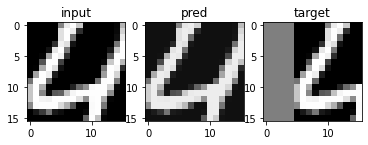

tf.Tensor(0.88916653, shape=(), dtype=float32)
epoch 10


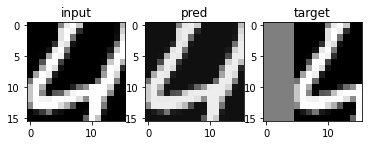

tf.Tensor(0.8888291, shape=(), dtype=float32)
epoch 11


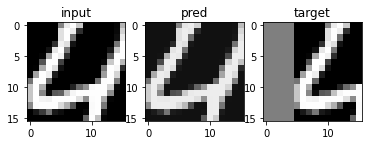

tf.Tensor(0.8884884, shape=(), dtype=float32)
epoch 12


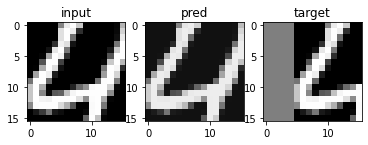

tf.Tensor(0.88814664, shape=(), dtype=float32)
epoch 13


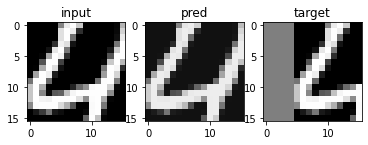

tf.Tensor(0.8878024, shape=(), dtype=float32)
epoch 14


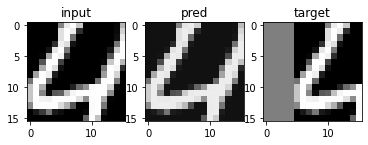

tf.Tensor(0.88745713, shape=(), dtype=float32)
epoch 15


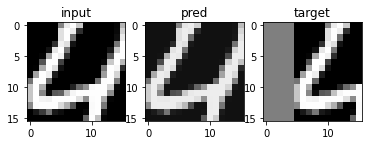

tf.Tensor(0.8871083, shape=(), dtype=float32)
epoch 16


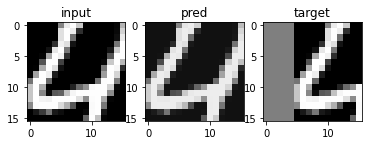

tf.Tensor(0.88675845, shape=(), dtype=float32)
epoch 17


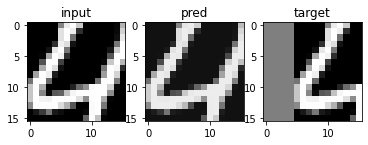

tf.Tensor(0.8864056, shape=(), dtype=float32)
epoch 18


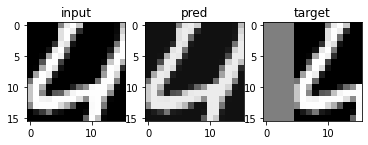

tf.Tensor(0.88605005, shape=(), dtype=float32)
epoch 19


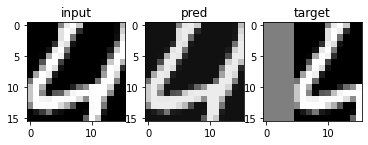

tf.Tensor(0.8856931, shape=(), dtype=float32)
epoch 20


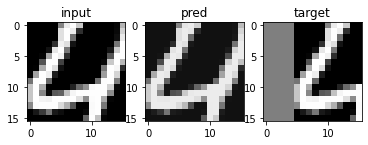

tf.Tensor(0.8853334, shape=(), dtype=float32)
epoch 21


KeyboardInterrupt: ignored

In [13]:
train_step(100)

In [75]:
import tensorflow as tf
def seq(lyrs):
  return [tf.keras.models.Sequential(lyr) for lyr in lyrs]
def lamb(start,end):
  return tf.keras.layers.Lambda(lambda x: x[:, :, :, start:end])
def conv_layer():
  return tf.keras.layers.Conv2DTranspose(1, (1, 16), (1,16), 'same', activation=tf.nn.tanh)
def b_model():
  inp = tf.keras.layers.Input([16, 16, 1])

  layers = seq([
                                tf.keras.layers.Flatten(),
            tf.keras.layers.Reshape(target_shape=[1, 1, 16*16*1]),
          *[lamb(x*16, (x+1)*16) for x in range(16)]
          #tf.keras.layers.Conv2D(filters=1, kernel_size=(1,1), strides=(1,1), padding="same", activation=tf.nn.tanh, use_bias=False)
          ])

  prev = inp
  for layer in layers[:2]:
    prev = layer(prev)



  layer_convolutions = []

  for lambdalayer in layers[2:]:
    thislayer = lambdalayer(prev)
    layer_convolutions += conv_layer()(thislayer),

  output = tf.keras.layers.concatenate(layer_convolutions, axis=1)

  return tf.keras.Model(inputs=inp, outputs=output)

model = b_model()

          


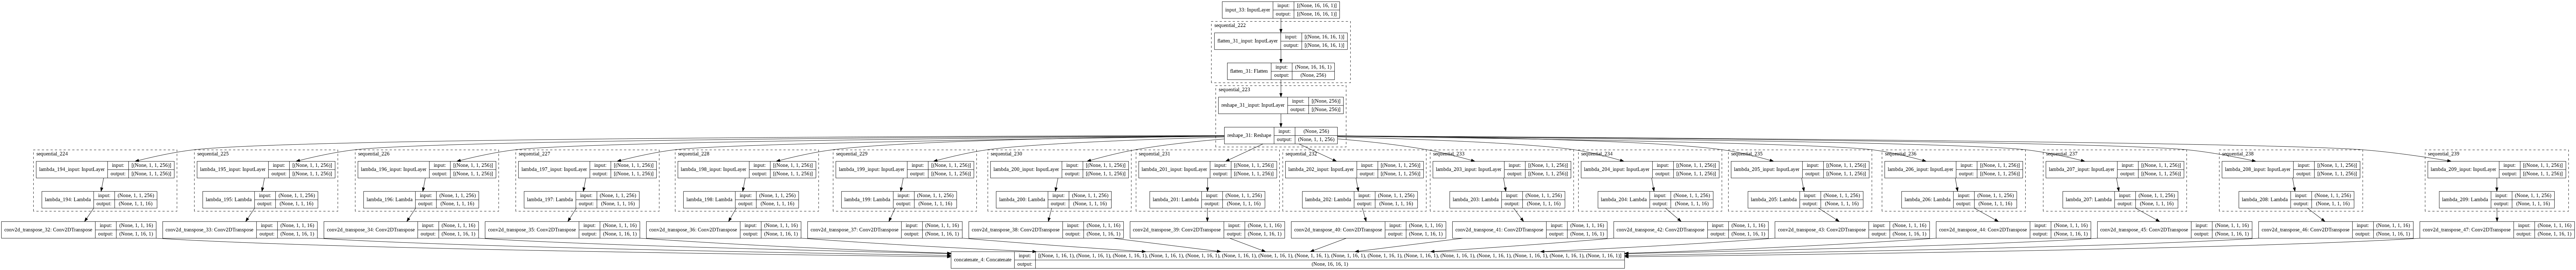

In [76]:
show_model()

epoch 0


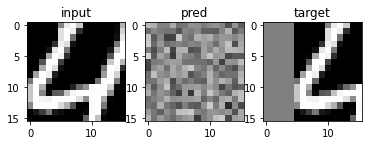

tf.Tensor(0.67129254, shape=(), dtype=float32)
epoch 1


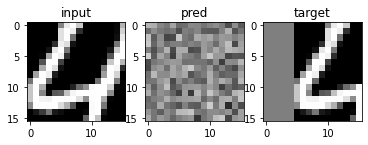

tf.Tensor(0.6447462, shape=(), dtype=float32)
epoch 2


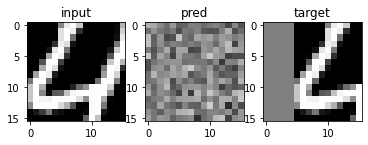

tf.Tensor(0.61510074, shape=(), dtype=float32)
epoch 3


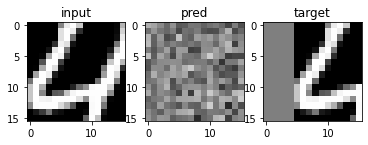

tf.Tensor(0.5855282, shape=(), dtype=float32)
epoch 4


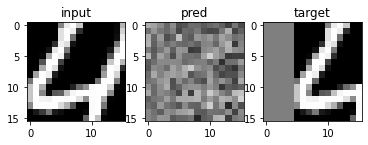

tf.Tensor(0.557487, shape=(), dtype=float32)
epoch 5


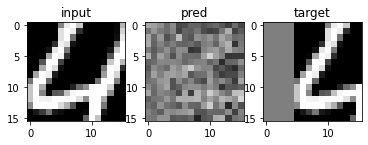

tf.Tensor(0.53172815, shape=(), dtype=float32)
epoch 6


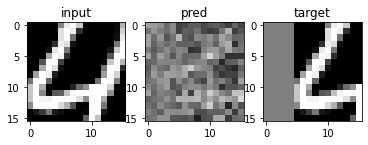

tf.Tensor(0.5084075, shape=(), dtype=float32)
epoch 7


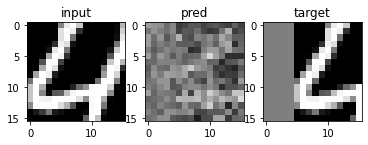

tf.Tensor(0.4873271, shape=(), dtype=float32)
epoch 8


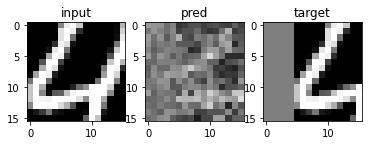

tf.Tensor(0.468294, shape=(), dtype=float32)
epoch 9


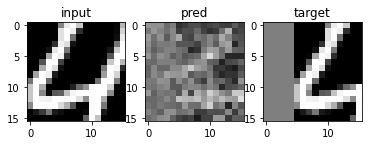

tf.Tensor(0.4511591, shape=(), dtype=float32)
epoch 10


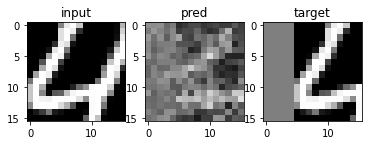

tf.Tensor(0.43563324, shape=(), dtype=float32)
epoch 11


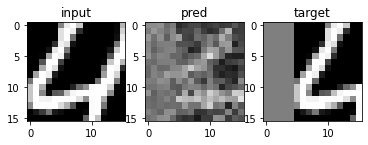

tf.Tensor(0.421585, shape=(), dtype=float32)
epoch 12


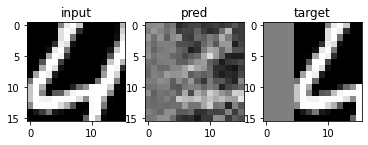

tf.Tensor(0.40892625, shape=(), dtype=float32)
epoch 13


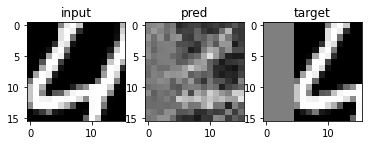

tf.Tensor(0.3975013, shape=(), dtype=float32)
epoch 14


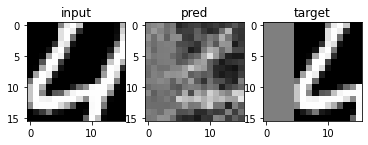

tf.Tensor(0.38708726, shape=(), dtype=float32)
epoch 15


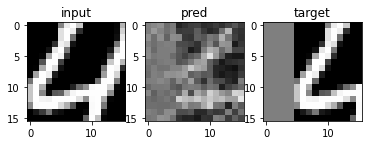

tf.Tensor(0.377499, shape=(), dtype=float32)
epoch 16


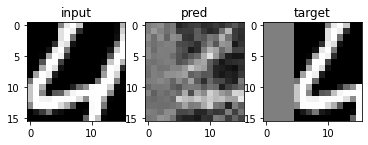

tf.Tensor(0.3686294, shape=(), dtype=float32)
epoch 17


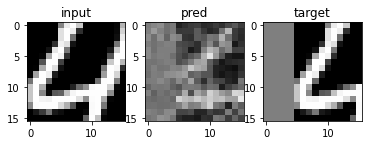

tf.Tensor(0.36040425, shape=(), dtype=float32)
epoch 18


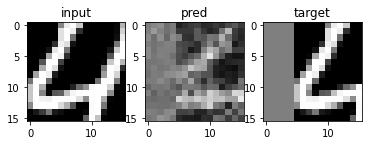

tf.Tensor(0.35274062, shape=(), dtype=float32)
epoch 19


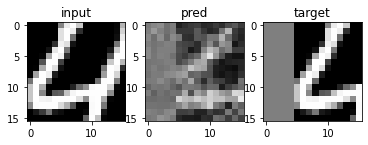

tf.Tensor(0.34560305, shape=(), dtype=float32)
epoch 20


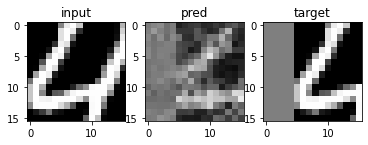

tf.Tensor(0.33893567, shape=(), dtype=float32)
epoch 21


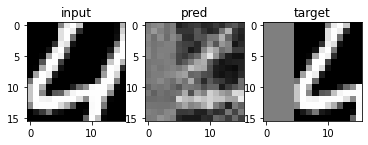

tf.Tensor(0.33268338, shape=(), dtype=float32)
epoch 22


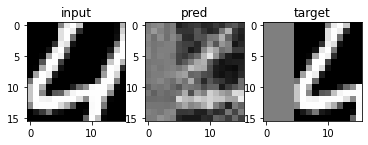

tf.Tensor(0.32670653, shape=(), dtype=float32)
epoch 23


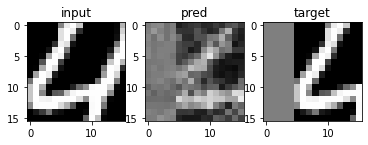

tf.Tensor(0.32105577, shape=(), dtype=float32)
epoch 24


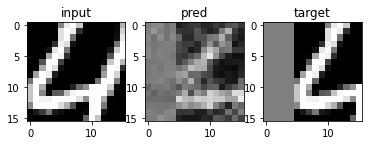

tf.Tensor(0.31569117, shape=(), dtype=float32)
epoch 25


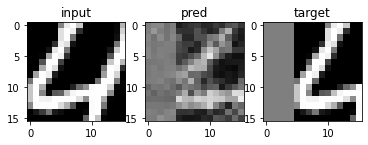

tf.Tensor(0.31058973, shape=(), dtype=float32)
epoch 26


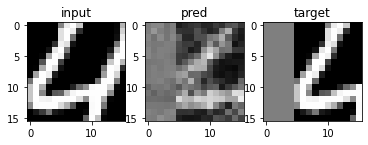

tf.Tensor(0.30570173, shape=(), dtype=float32)
epoch 27


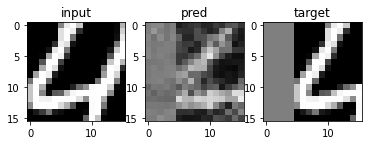

tf.Tensor(0.3010177, shape=(), dtype=float32)
epoch 28


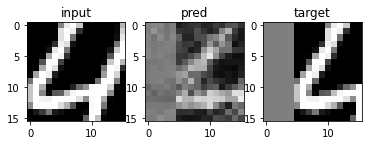

tf.Tensor(0.29654452, shape=(), dtype=float32)
epoch 29


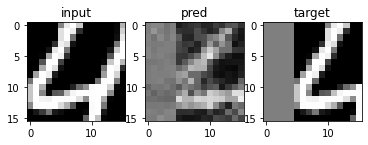

tf.Tensor(0.29224092, shape=(), dtype=float32)
epoch 30


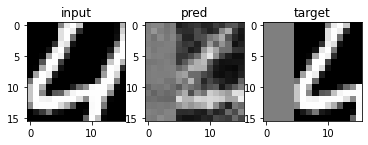

tf.Tensor(0.28809765, shape=(), dtype=float32)
epoch 31


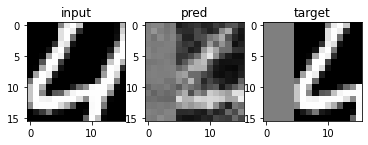

tf.Tensor(0.2840907, shape=(), dtype=float32)
epoch 32


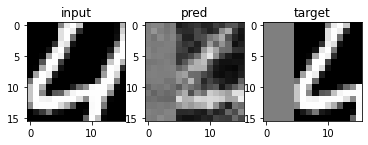

tf.Tensor(0.28019786, shape=(), dtype=float32)
epoch 33


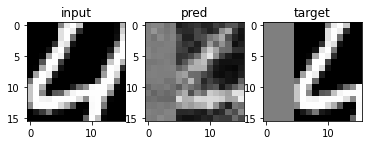

tf.Tensor(0.27646318, shape=(), dtype=float32)
epoch 34


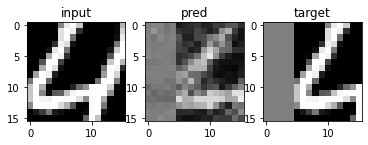

tf.Tensor(0.27284724, shape=(), dtype=float32)
epoch 35


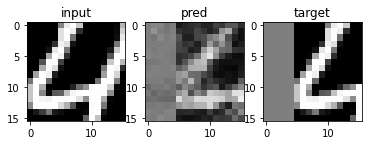

tf.Tensor(0.26934135, shape=(), dtype=float32)
epoch 36


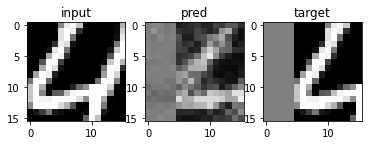

tf.Tensor(0.26592758, shape=(), dtype=float32)
epoch 37


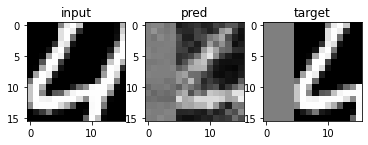

tf.Tensor(0.26262888, shape=(), dtype=float32)
epoch 38


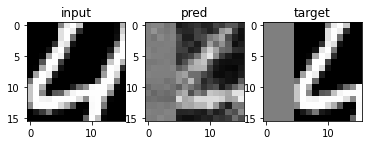

tf.Tensor(0.25940943, shape=(), dtype=float32)
epoch 39


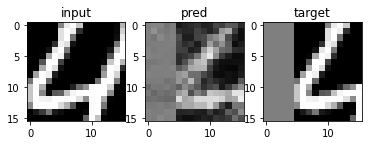

tf.Tensor(0.25627965, shape=(), dtype=float32)
epoch 40


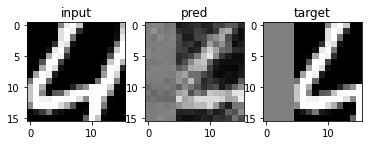

tf.Tensor(0.25323215, shape=(), dtype=float32)
epoch 41


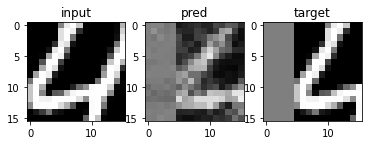

tf.Tensor(0.25026563, shape=(), dtype=float32)
epoch 42


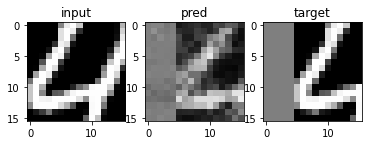

tf.Tensor(0.24736974, shape=(), dtype=float32)
epoch 43


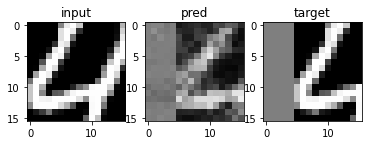

tf.Tensor(0.2445516, shape=(), dtype=float32)
epoch 44


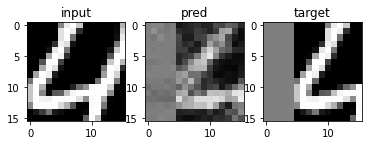

tf.Tensor(0.24181323, shape=(), dtype=float32)
epoch 45


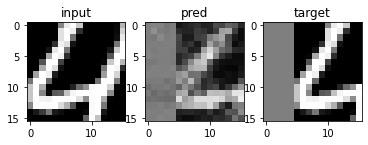

tf.Tensor(0.2391253, shape=(), dtype=float32)
epoch 46


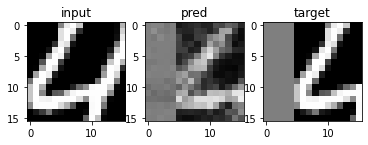

tf.Tensor(0.23652676, shape=(), dtype=float32)
epoch 47


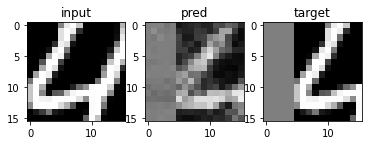

tf.Tensor(0.23395228, shape=(), dtype=float32)
epoch 48


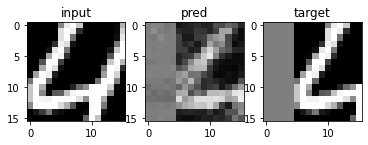

tf.Tensor(0.23146245, shape=(), dtype=float32)
epoch 49


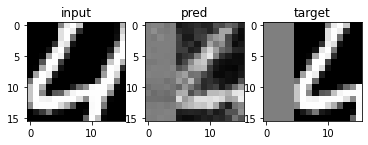

tf.Tensor(0.2290309, shape=(), dtype=float32)


In [77]:
train_step(50)